# import libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

# initialize the cnn model

In [2]:
model=Sequential()

# add layers
1. conv layer 
2. pooling layer
3. flatten layer
4. fully connected layer
5. output layers

In [3]:
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation ="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [4]:
model.add(Flatten())

In [5]:
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=500))

In [6]:
model.add(Dense(units=2,activation="softmax",kernel_initializer="random_uniform"))


In [7]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train=ImageDataGenerator(rescale=1./255,
                        shear_range=.2,
                        zoom_range=.2
                        ,horizontal_flip=True)

In [11]:
test=ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train.flow_from_directory('cell_images/Train',
                                                 target_size = (64, 64),
                                                 batch_size=60 ,
                                                 class_mode = 'categorical')

Found 27558 images belonging to 2 classes.


In [13]:
testing_set = test.flow_from_directory('cell_images/Test',
                                            target_size = (64, 64),
                                            batch_size = 60,
                                            class_mode = 'categorical')


Found 13571 images belonging to 2 classes.


In [14]:
print(len(training_set))
print(len(testing_set))

460
227


In [15]:
testing_set.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [16]:
r = model.fit_generator( training_set,
  validation_data=testing_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(testing_set))

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
460/460 [==============================] - 1506s 3s/step - loss: 0.5792 - accuracy: 0.6660 - val_loss: 0.1693 - val_accuracy: 0.9487
Epoch 2/10
460/460 [==============================] - 876s 2s/step - loss: 0.1638 - accuracy: 0.9472 - val_loss: 0.1391 - val_accuracy: 0.9537
Epoch 3/10
460/460 [==============================] - 940s 2s/step - loss: 0.1401 - accuracy: 0.9561 - val_loss: 0.1286 - val_accuracy: 0.9562
Epoch 4/10
460/460 [==============================] - 920s 2s/step - loss: 0.1320 - accuracy: 0.9563 - val_loss: 0.1425 - val_accuracy: 0.9525
Epoch 5/10
460/460 [==============================] - 843s 2s/step - loss: 0.1248 - accuracy: 0.9592 - val_loss: 0.1253 - val_accuracy: 0.9569
Epoch 6/10
460/460 [==============================] - 1169s 3s/step - loss: 0.1224 - accuracy: 0.9590 - val_loss: 0.1194 - val_accuracy: 0.9589
Epoch 7/10
460/460 [==============================] - 1080s 2s/step - loss: 0.1215 - accuracy: 0.9587 - val_loss: 0.1334 - val_accuracy: 0.9

In [17]:
import matplotlib.pyplot as plt

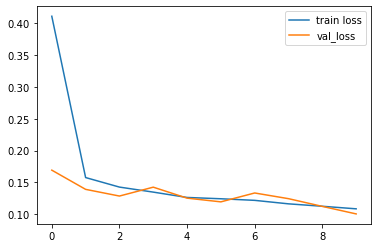

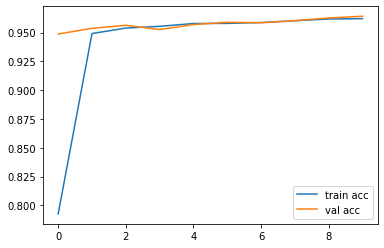

In [18]:
plt.plot(r.history["loss"],label="train loss")
plt.plot(r.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [19]:
y_pred=model.predict(testing_set)

In [20]:
y_pred

array([[1.3224952e-03, 9.9867743e-01],
       [7.3379935e-03, 9.9266195e-01],
       [6.0726875e-03, 9.9392724e-01],
       ...,
       [9.9999928e-01, 7.6833402e-07],
       [1.2614955e-02, 9.8738503e-01],
       [4.1067891e-02, 9.5893216e-01]], dtype=float32)

In [21]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
model.save("malaria_prd.h5")